# CM3430 Computational Statistics
##  Take-Home Assignment
## 215533M - Kodithuwakku A.S.




---


In [66]:
# !pip install pandas matplotlib seaborn scikit-learn
# !pip install xgboost

## Data Loading and Initial Setup

### Import libraries and load the dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
data = pd.read_csv("/content/drive/MyDrive/L3S1/Computational Statistics/Assignment/heart.csv")

### Basic data inspection

In [69]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [70]:
data.shape

(1025, 14)

In [71]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no any null values in the dataset.

In [72]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Data Visualization

### 1. Scatterplot Matrix

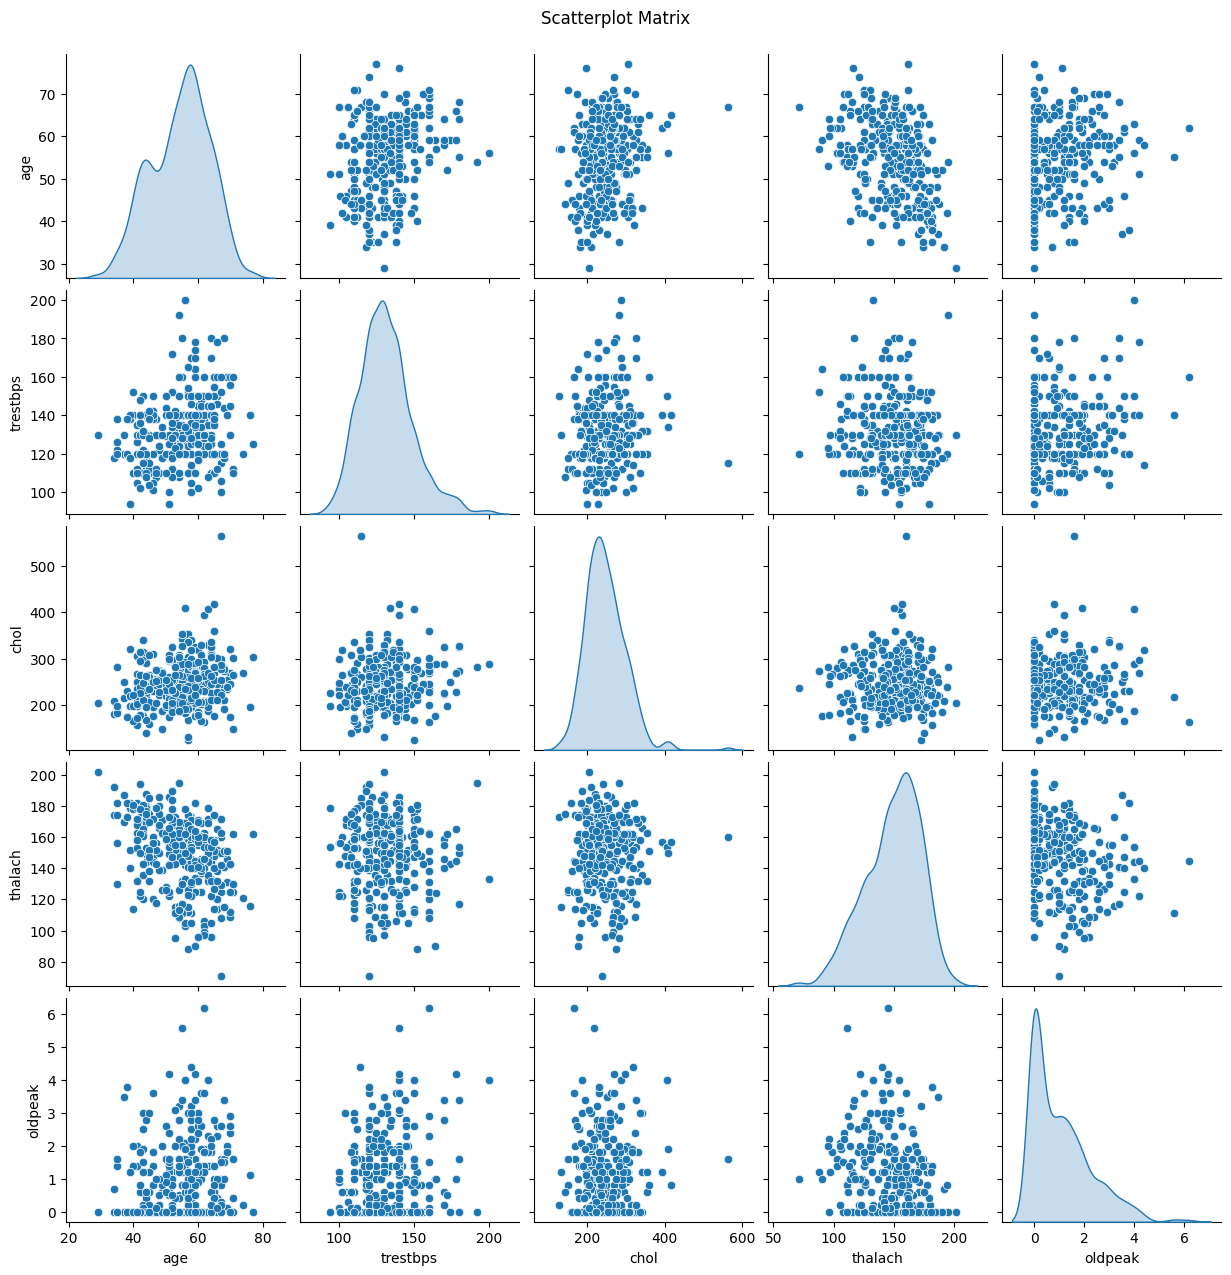

In [74]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(data[selected_features], diag_kind='kde')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

We can see that there is no any strong linear relationship between any two variables. But we can see that, there is a weak negative relationship between age and the maximum heart rate(thalach).

Also, We cannot see any clear clusters using this scatterplot matrix, so first we will see how these variables are correlated according to "sex". Because sex is a categorical variable.

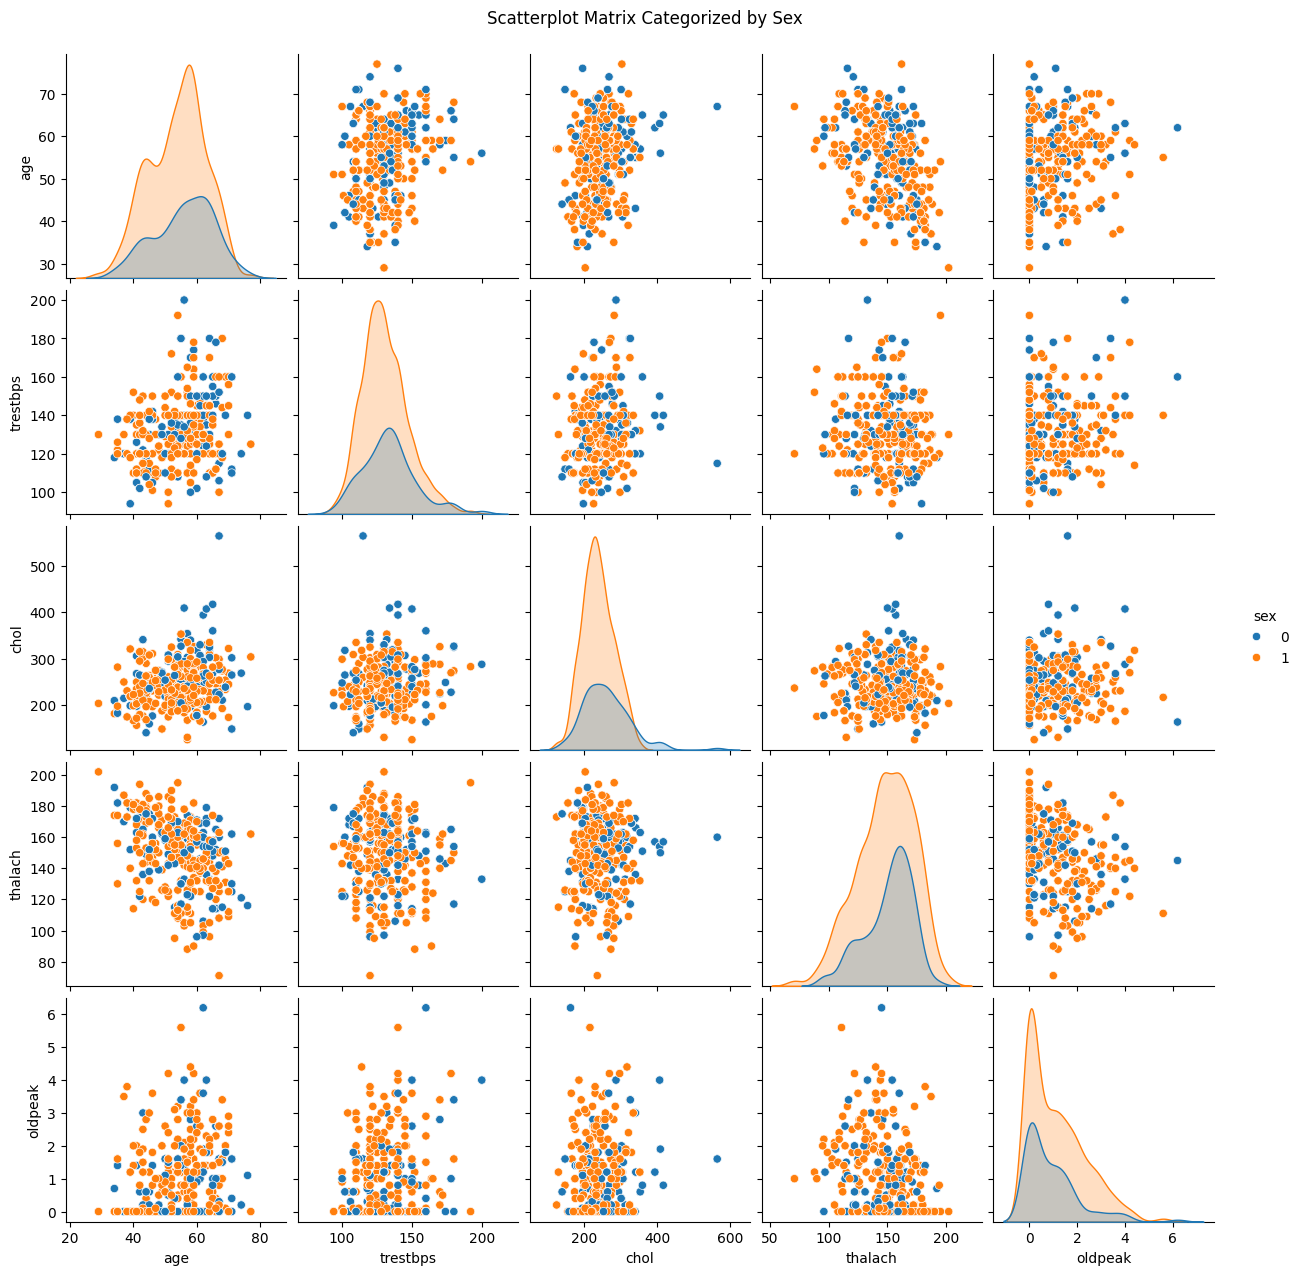

In [75]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex']
sns.pairplot(data[selected_features], hue='sex', diag_kind='kde')
plt.suptitle('Scatterplot Matrix Categorized by Sex', y=1.02)
plt.show()

These pairwise plots show the distribution of each feature split by sex. According to the graph, we can see that for many features, the males (orange) has a wider spread compared to the females (blue).

Also, we can see that oldpeak values cluster near zero.

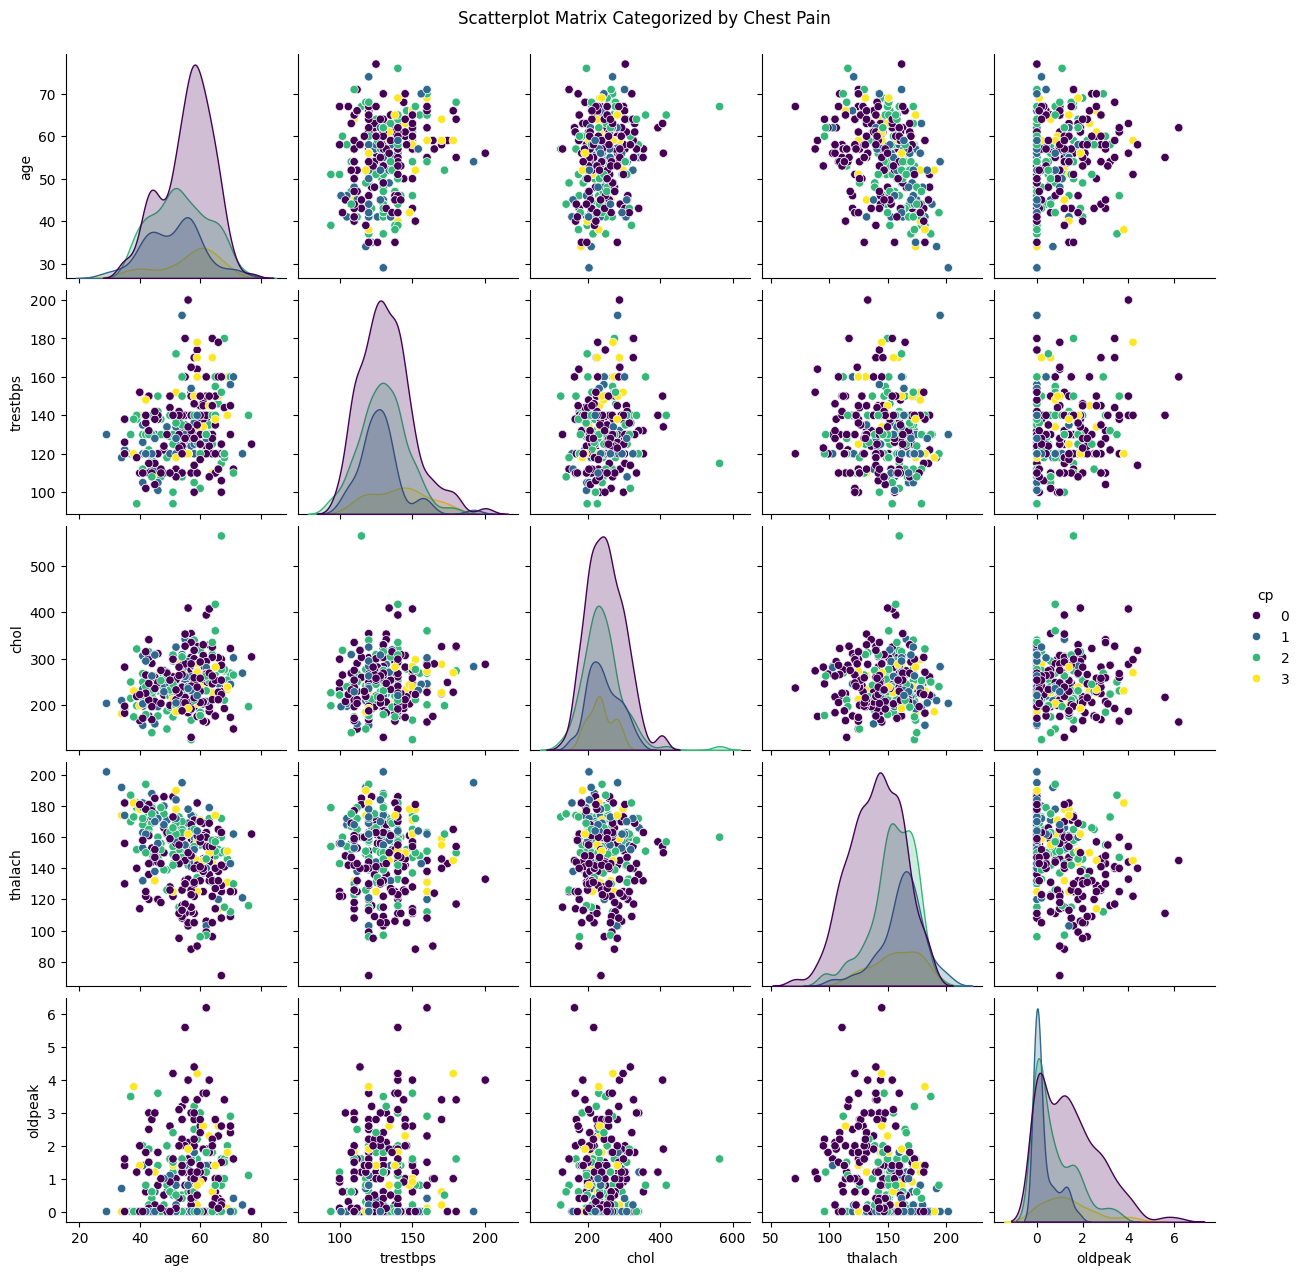

In [76]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp']
sns.pairplot(data[selected_features], hue='cp', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by Chest Pain', y=1.02)
plt.show()

There is no clear seperation with chest pain types. Serum cholesterol includes some clear outliers above 400.

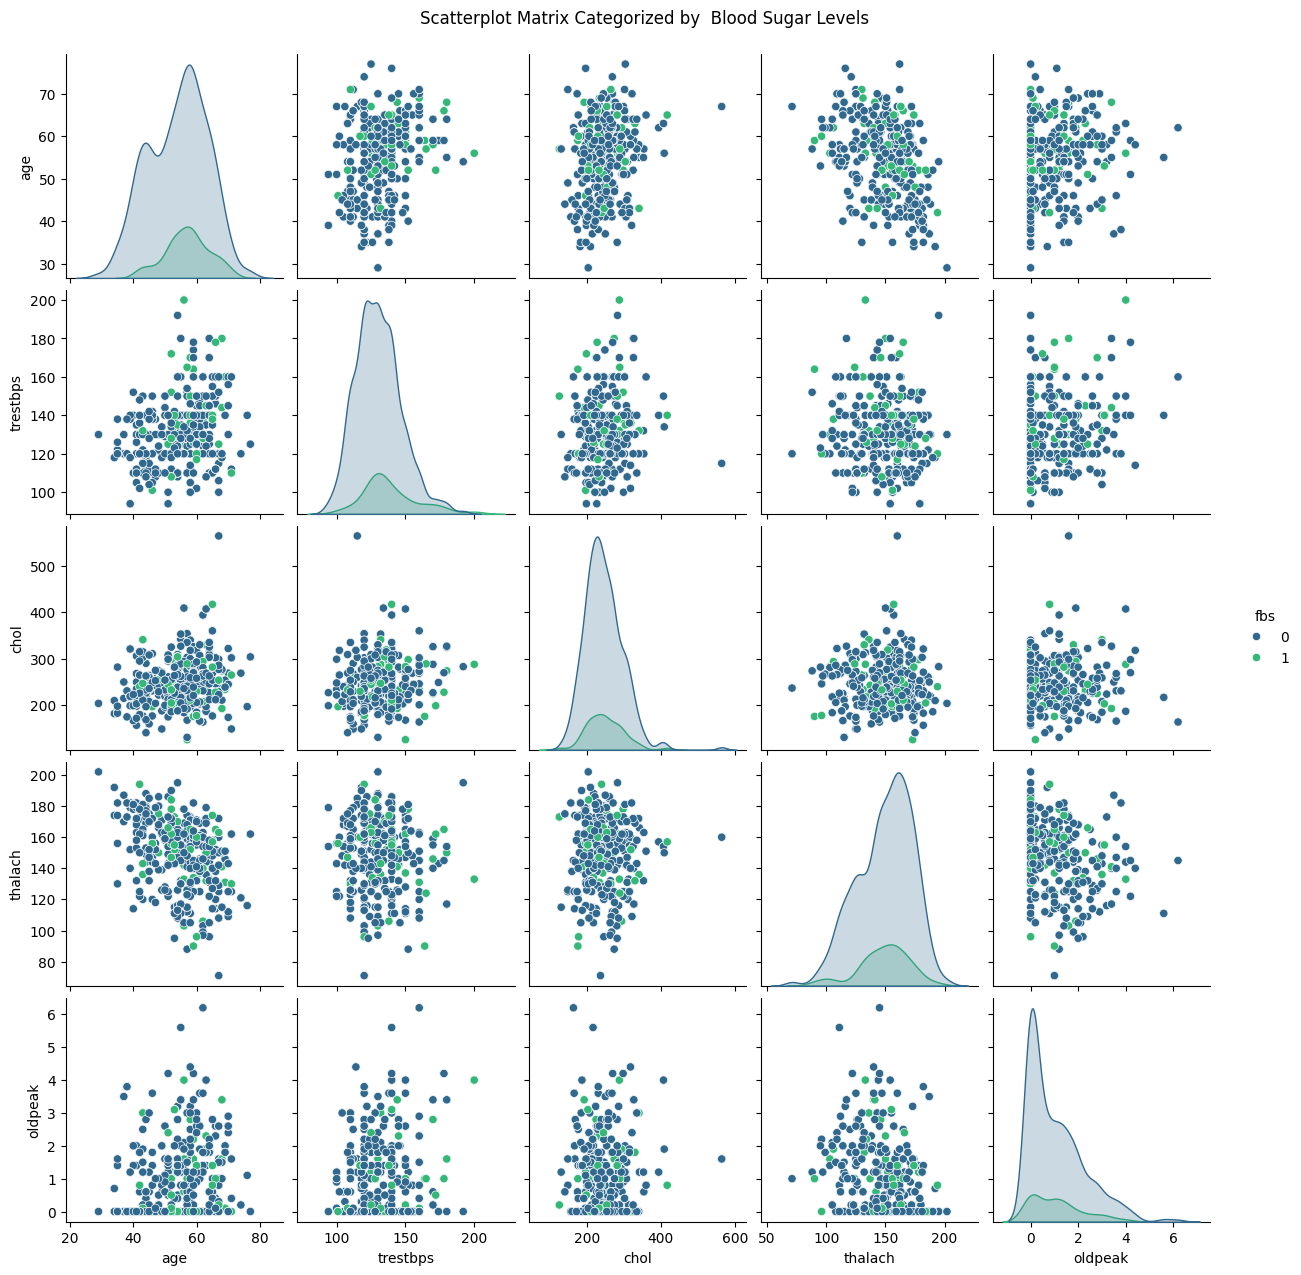

In [77]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'fbs']
sns.pairplot(data[selected_features], hue='fbs', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by  Blood Sugar Levels', y=1.02)
plt.show()

Mostly, middle-aged patients have High blood sugar(1). But, normal blood sugar(0) distributed across all ages.

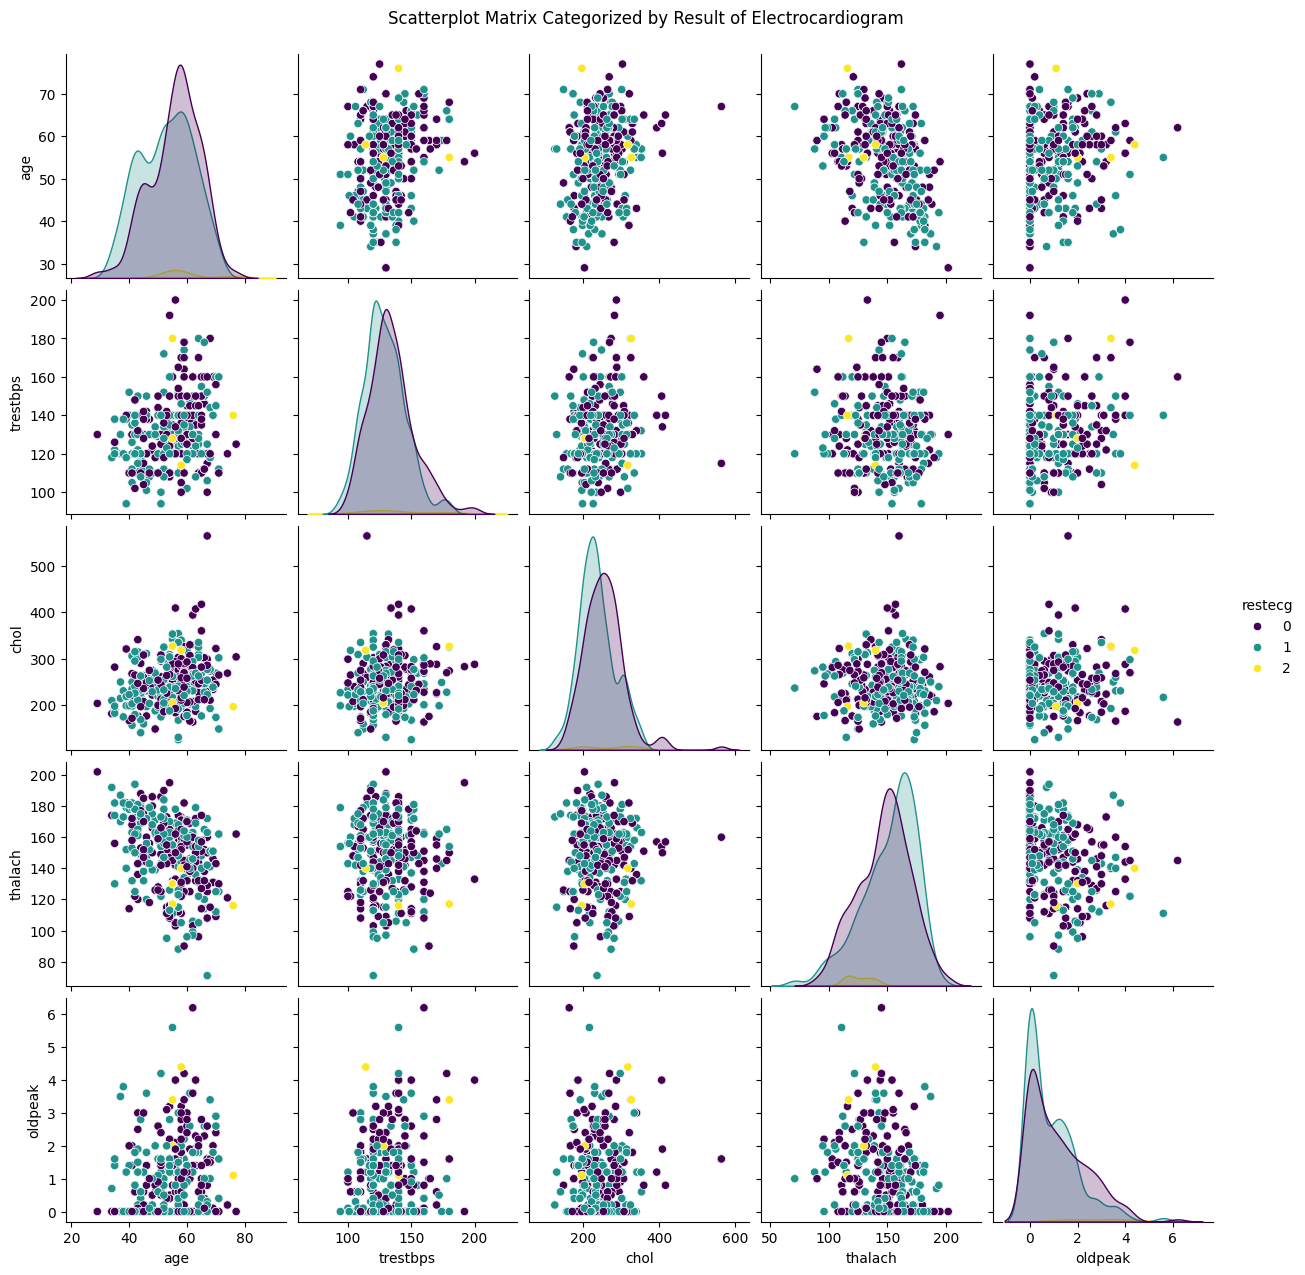

In [78]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'restecg']
sns.pairplot(data[selected_features], hue='restecg', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by Result of Electrocardiogram', y=1.02)
plt.show()

When it compares to other two categories in Result of Electrocardiogram, category "2" has less amount of data.

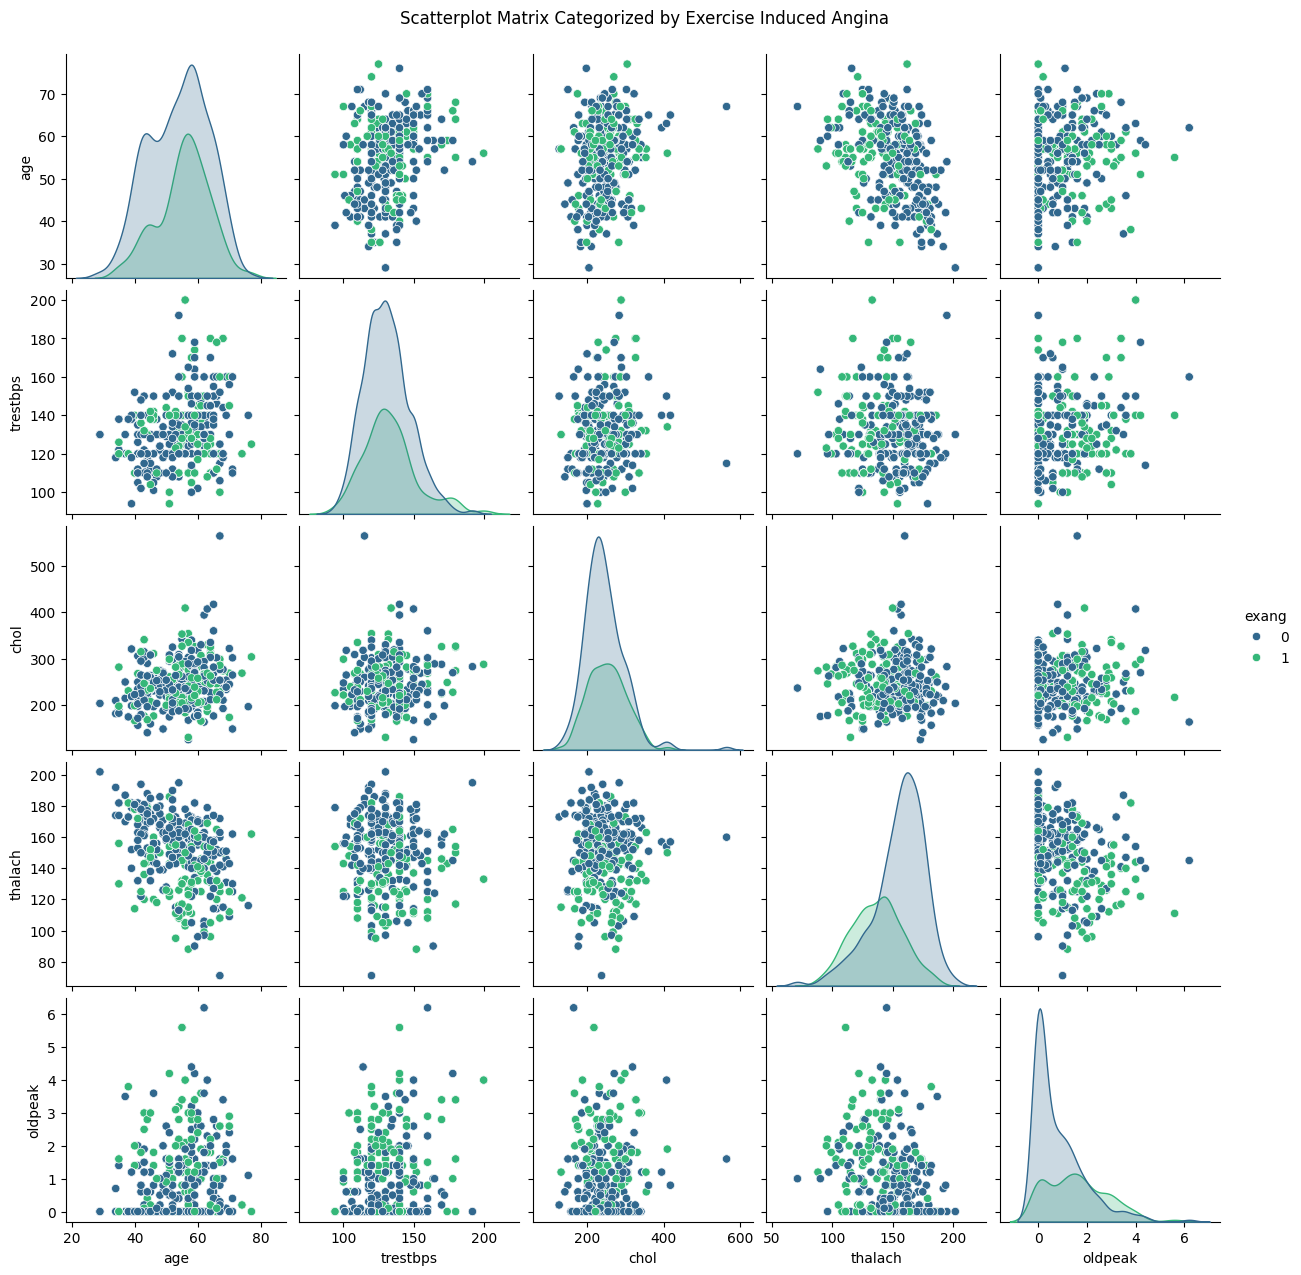

In [79]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'exang']
sns.pairplot(data[selected_features], hue='exang', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by Exercise Induced Angina', y=1.02)
plt.show()

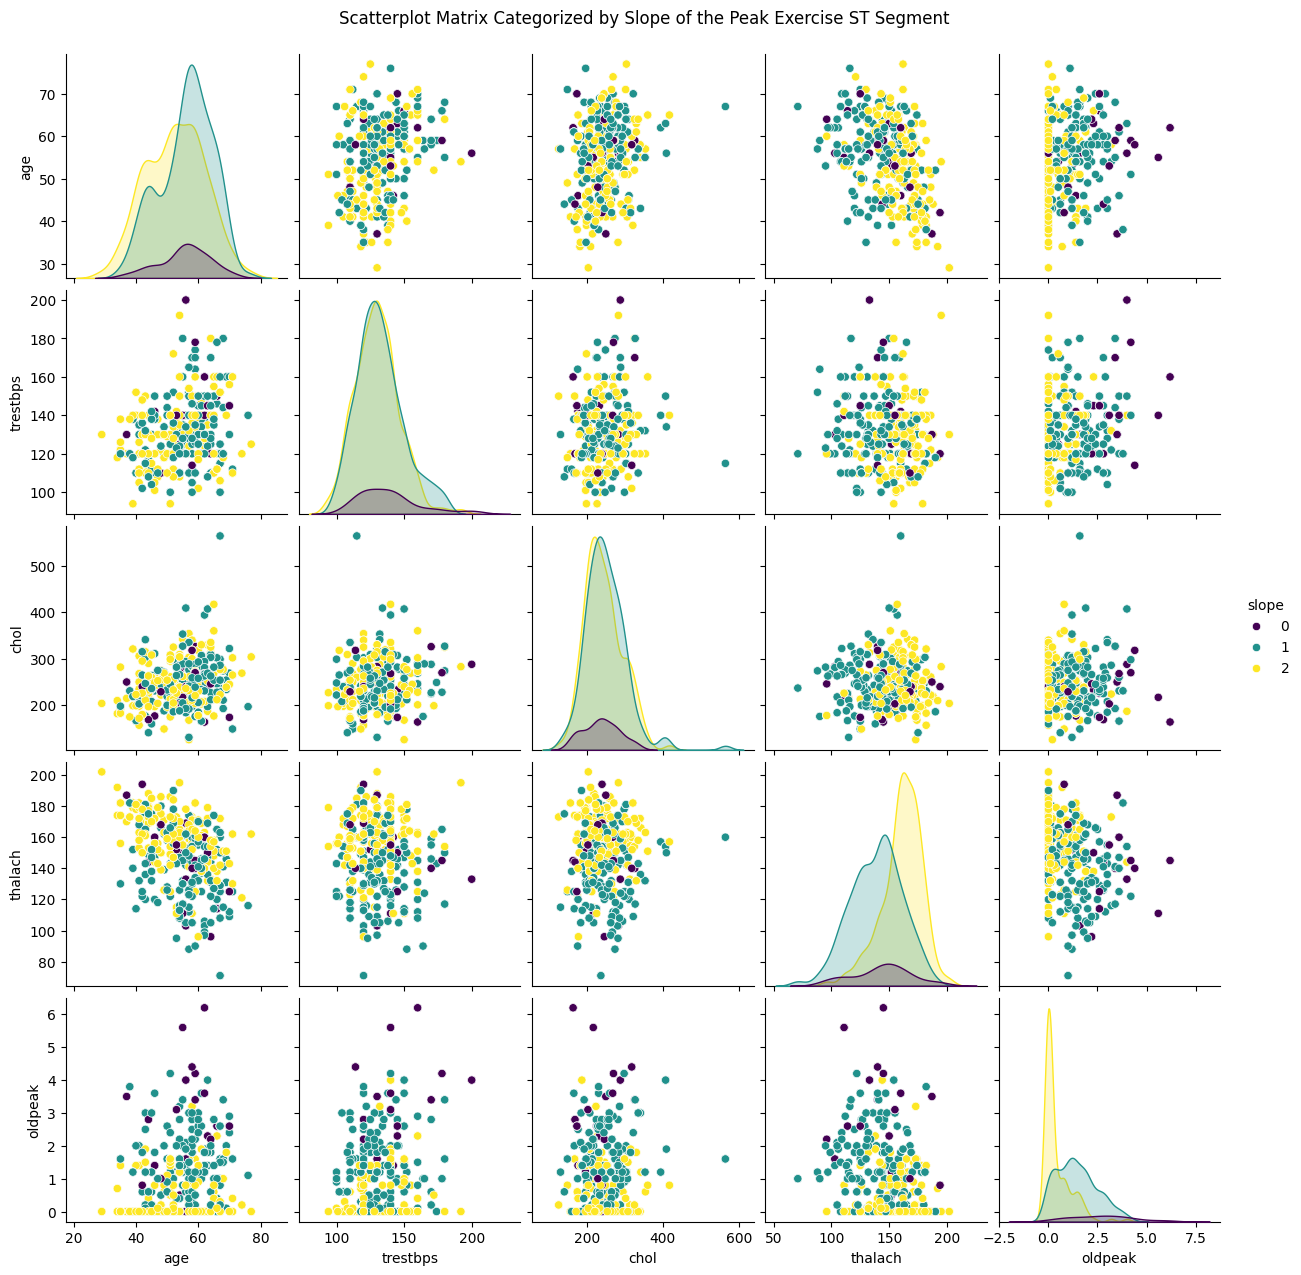

In [80]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']
sns.pairplot(data[selected_features], hue='slope', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by Slope of the Peak Exercise ST Segment', y=1.02)
plt.show()

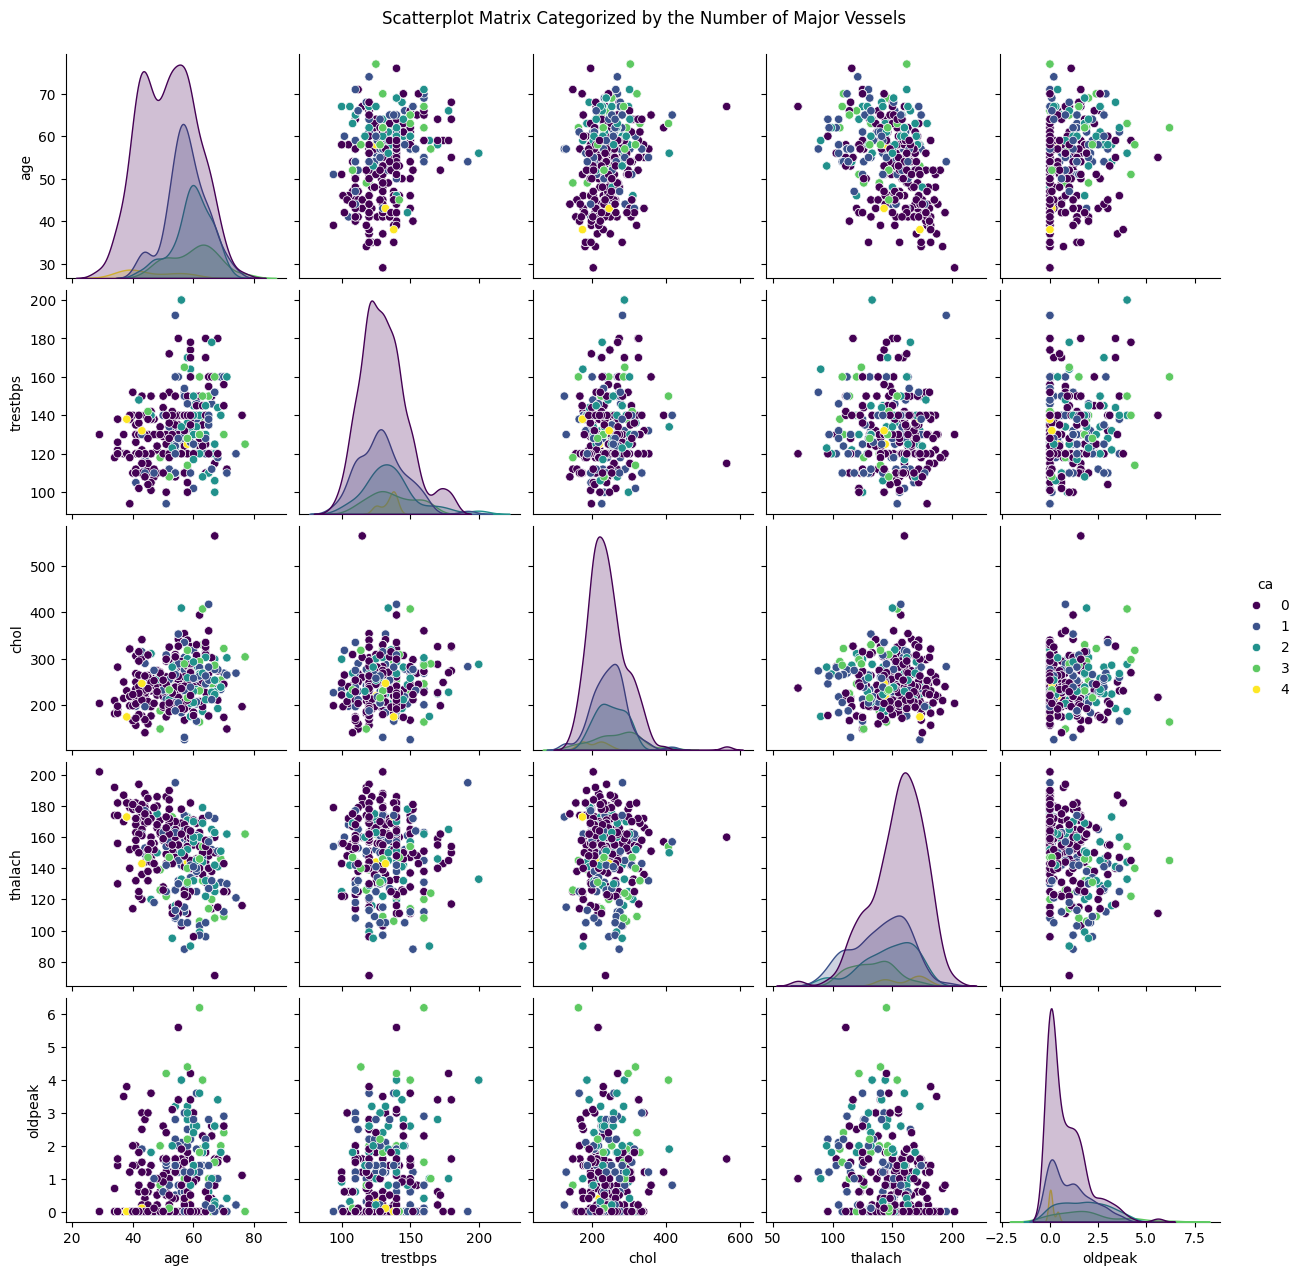

In [81]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
sns.pairplot(data[selected_features], hue='ca', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by the Number of Major Vessels', y=1.02)
plt.show()

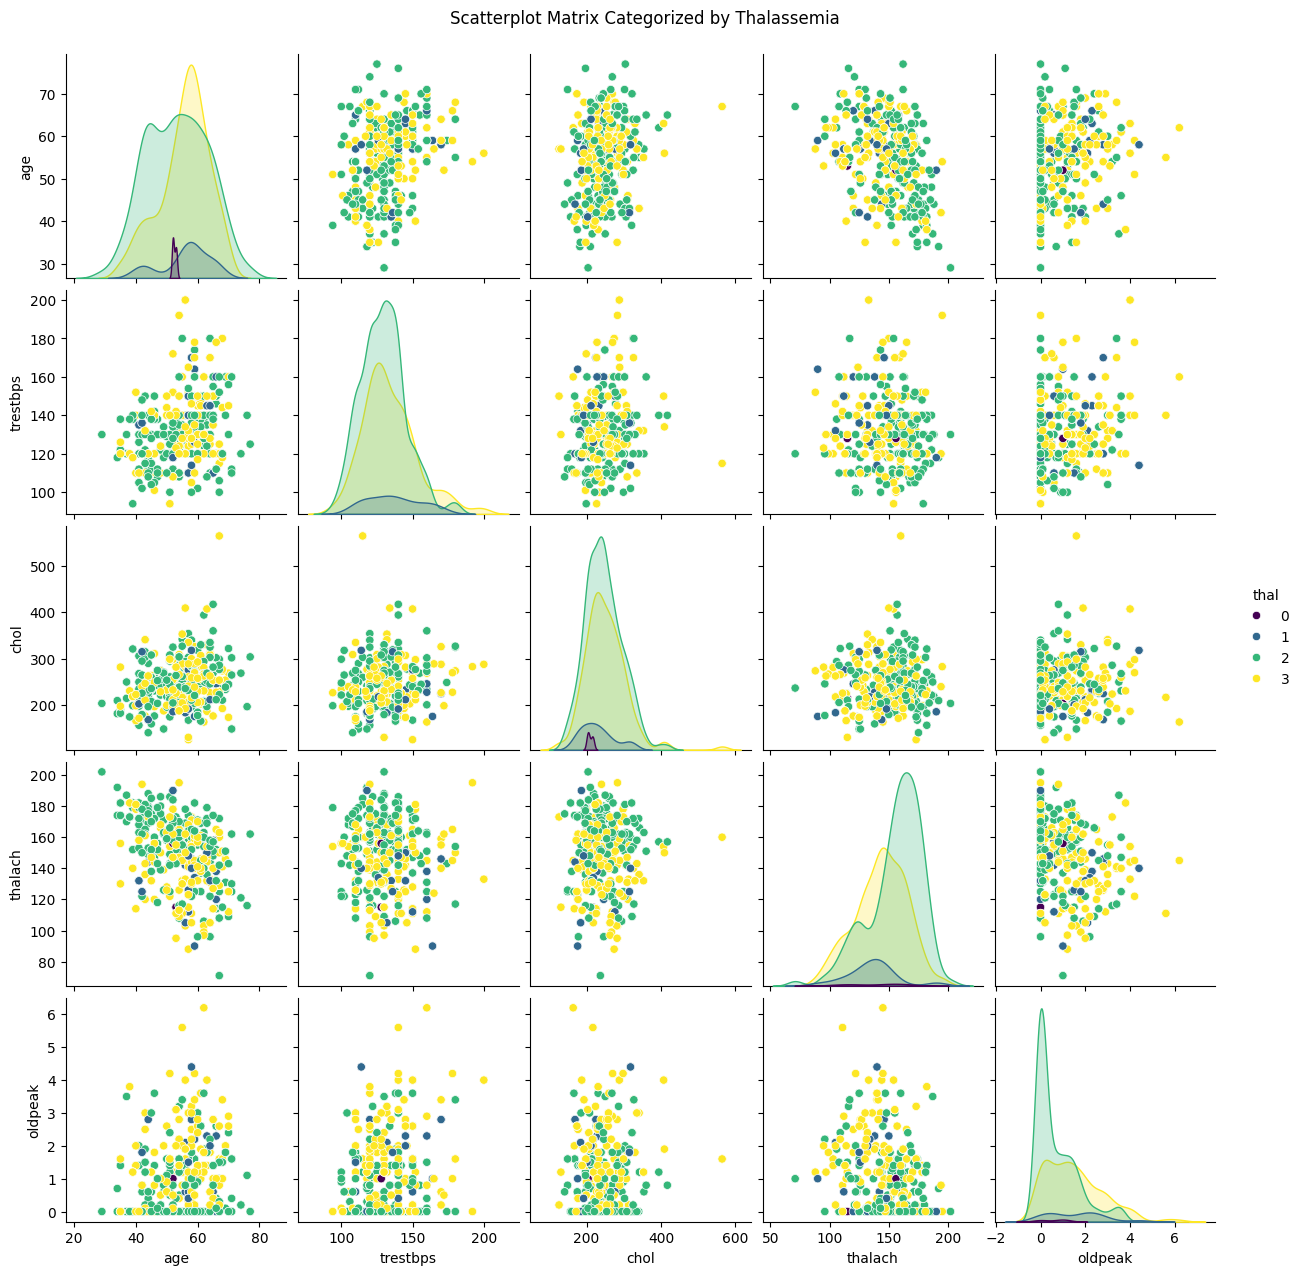

In [82]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'thal']
sns.pairplot(data[selected_features], hue='thal', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by Thalassemia', y=1.02)
plt.show()

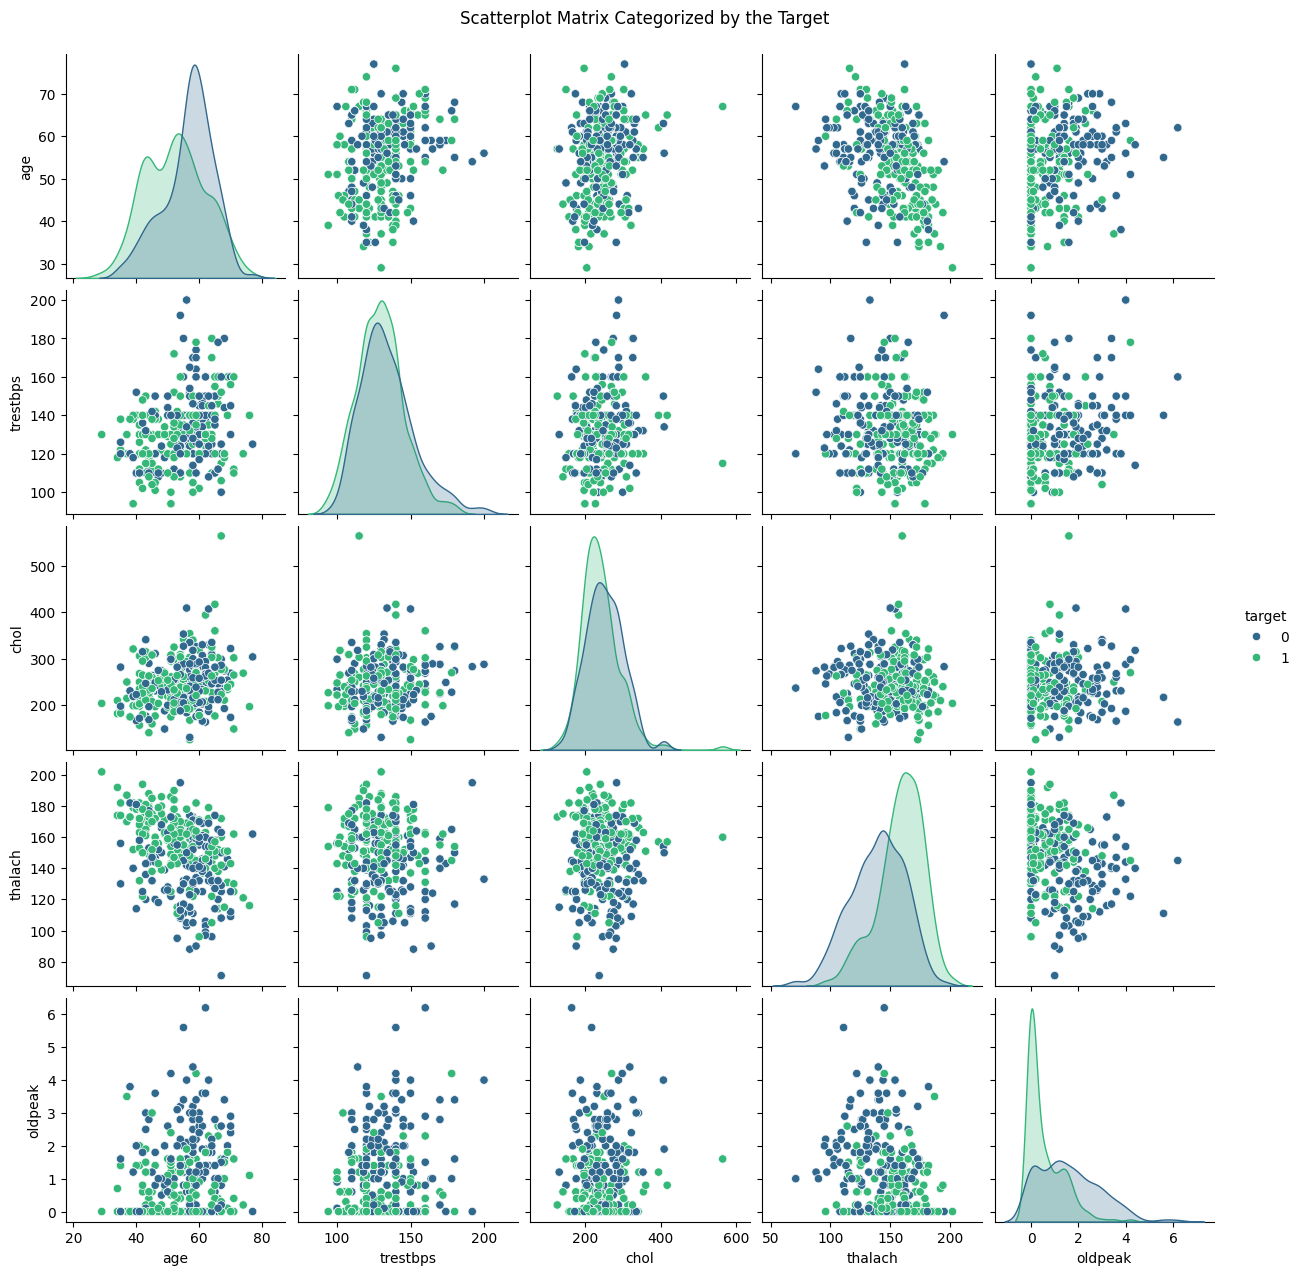

In [83]:
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(data[selected_features], hue='target', diag_kind='kde', palette='viridis')
plt.suptitle('Scatterplot Matrix Categorized by the Target', y=1.02)
plt.show()

### 2. Parallel Coordinates Plot

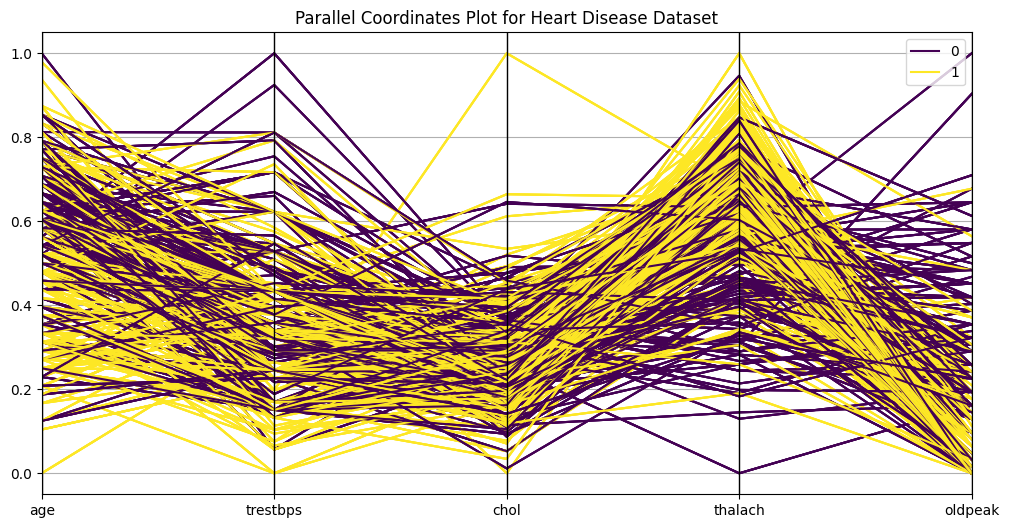

In [84]:
# Normalize numerical features
features_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[features_to_plot[:-1]] = scaler.fit_transform(data[features_to_plot[:-1]])

# Plot parallel coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(data_normalized[features_to_plot], class_column='target', colormap='viridis')
plt.title('Parallel Coordinates Plot for Heart Disease Dataset')
plt.show()

We can say that, patients who are suffering from heart disease, have low cholesterol level, higher heart rates and lower oldpeak. Also, thalach and oldpeak appear to differentiate between classes more effectively, so they may be more informative in predicting heart disease.

### 3. Correlation Matrix Plot

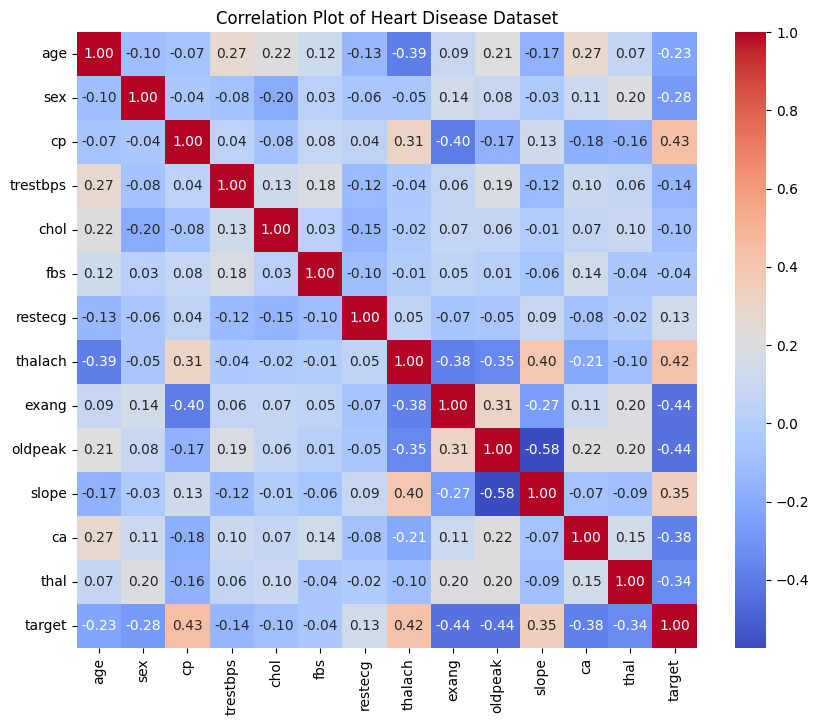

In [85]:
# correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Plot of Heart Disease Dataset')
plt.show()

We can see that, there are both positively and negatively correlated features. cp, thalach, slope like features are positively correlated and oldpeak, exang, ca, thal are negatively correlated.

Features like chol(Serum Cholesterol) and fbs(Fasting Blood Sugar) show very weak correlations with the target variable, so they might have limited predictive power for heart disease.

If we consider some inter-feature correlations, we can say that:

- thalach(Maximum Heart Rate) is negatively correlated with age(-0.39) and it means younger individuals tend to have higher maximum heart rates.
- Oldpeak is negatively correlated with slope(-0.58), indicating that the slope decreases as ST depression increases.

## Model Development

### Split the dataset into training and testing sets

In [86]:
X = data.drop(columns=['target'])
y = data['target']

# Perform a stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Building two classification models

#### Random Forest Classifier

In [87]:
rf_model = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions with Random Forest
rf_y_pred = rf_model.predict(X_test)

#### XGBoost Classifier

In [88]:
xgb_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions with XGBoost
xgb_y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 ### Training accuracy and testing accuracy of models

#### 1. Accuracy of Random Forest

In [89]:
rf_y_train_pred = rf_model.predict(X_train)

# Calculate training and testing accuracies
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)

print("Random Forest Model:")
print(f"Training Accuracy: {rf_train_accuracy:.2f}")
print(f"Testing Accuracy: {rf_test_accuracy:.2f}")

Random Forest Model:
Training Accuracy: 0.95
Testing Accuracy: 0.93


#### 2. Accuracy of XGBoost

In [90]:
xgb_y_train_pred = xgb_model.predict(X_train)

# Calculate training and testing accuracies
xgb_train_accuracy = accuracy_score(y_train, xgb_y_train_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_pred)

print("\nXGBoost Model:")
print(f"Training Accuracy: {xgb_train_accuracy:.2f}")
print(f"Testing Accuracy: {xgb_test_accuracy:.2f}")


XGBoost Model:
Training Accuracy: 1.00
Testing Accuracy: 0.98


### Performance Discussion

#### **Random Forest**

Training Accuracy: 95%
Testing Accuracy: 93%

Analysis:

- There is a close alignment between training and testing accuracy. We can say that, the Random Forest model is generalizing well without overfitting.

- We have 93% testing accuracy, and it indicates that the model performs well on unseen data, making it reliable for predicting heart disease outcomes.

- Therefore, we can say that, there is a good generalization ability with no evidence of overfitting.


#### **XGBoost**

Training Accuracy: 100%
Testing Accuracy: 98%

Analysis:

- XGBoost model has achieved perfect training accuracy, it indicates that the model has learned the training data thoroughly.

- The 98% testing accuracy shows that the model generalizes well to unseen data despite its complexity and potential for overfitting.

- XGBoost has an higher testing accuracy, outperforming Random Forest.

- The perfect training accuracy may indicate overfitting, even though testing accuracy remains high.

## Model Comparison

### Absolute difference in test set accuracy between Random Forest and XGBoost using the original test labels

In [91]:
# Calculate the test accuracies
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_pred)

# Calculate the absolute difference
accuracy_difference = abs(xgb_test_accuracy - rf_test_accuracy)

print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")
print(f"XGBoost Test Accuracy: {xgb_test_accuracy:.2f}")
print(f"Absolute Difference in Test Accuracy: {accuracy_difference:.2f}")

Random Forest Test Accuracy: 0.93
XGBoost Test Accuracy: 0.98
Absolute Difference in Test Accuracy: 0.05


**Conclusion:**

The results show that the XGBoost model has achieved a higher test accuracy (98%) compared to Random Forest (93%), with an absolute difference of 5 percentage points. This suggests that XGBoost is better at identifying patterns in the data and generalizing to unseen examples.

 ### Model Validation Using a Permutation Test

In [92]:
# Number of permutations
n_permutations = 1000

# Observed accuracy difference
observed_diff = abs(xgb_test_accuracy - rf_test_accuracy)

# Combine test predictions and actual labels
combined_labels = np.array(y_test)
xgb_predictions = xgb_y_pred
rf_predictions = rf_y_pred

permuted_differences = []

# Permutation test
for _ in range(n_permutations):
    permuted_labels = np.random.permutation(combined_labels)

    xgb_permuted_accuracy = accuracy_score(permuted_labels, xgb_predictions)
    rf_permuted_accuracy = accuracy_score(permuted_labels, rf_predictions)

    permuted_diff = abs(xgb_permuted_accuracy - rf_permuted_accuracy)
    permuted_differences.append(permuted_diff)

permuted_differences = np.array(permuted_differences)

# Calculate the p-value
p_value = np.mean(permuted_differences >= observed_diff)

print(f"Observed Accuracy Difference: {observed_diff:.4f}")
print(f"P-Value from Permutation Test: {p_value:.4f}")

Observed Accuracy Difference: 0.0537
P-Value from Permutation Test: 0.0030


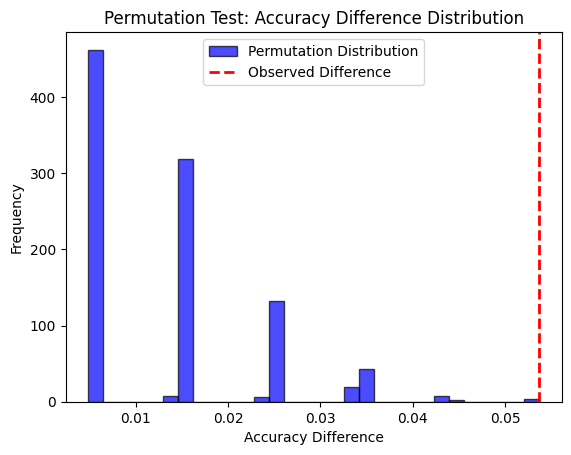

In [93]:
# Plot the permutation distribution
plt.hist(permuted_differences, bins=30, alpha=0.7, color='blue', edgecolor='black', label='Permutation Distribution')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=2, label='Observed Difference')
plt.title('Permutation Test: Accuracy Difference Distribution')
plt.xlabel('Accuracy Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [94]:
# Significance level
alpha = 0.05

# Check statistical significance
if p_value <= alpha:
    print(f"The observed difference ({observed_diff:.4f}) is statistically significant (p-value = {p_value:.4f}).")
    print("Reject the null hypothesis: The performance difference is unlikely due to random chance.")
else:
    print(f"The observed difference ({observed_diff:.4f}) is not statistically significant (p-value = {p_value:.4f}).")
    print("Fail to reject the null hypothesis: The performance difference could be due to random chance.")


The observed difference (0.0537) is statistically significant (p-value = 0.0030).
Reject the null hypothesis: The performance difference is unlikely due to random chance.




---

